**<center><h1>Outliers Detection and treatment</h1></center>**


**<h2>Outliers Detection</h2>**

In simple words outliers is an observation that is far away from the range of values. Outliers are from the experimental errror, data entry error, mesurement error etc.

Outliers will effect the accuracy of  the model so treating them will give better result.

Their are 4 ways to detect outliers.

- Using Boxplot
- Using Inter Quartile Range
- Using Z-score


**1. Using Boxplot**

<center><img src = "https://miro.medium.com/max/1400/1*0MPDTLn8KoLApoFvI0P2vQ.png" width = 450px></center>



By using boxplot method we can able to detect the outliers visually.Their are few terminology used in boxplot

- Q1 : The value at 25% percentage this is also call 25 percentile.

- Q2 : The middle value of the dataset. It is also called 50th percentile.

- Q3 : The value at 75% of percentage. This is also call 75th percentile.

- IQR (Inter Quartile Range) : IQR stands for interquartile range, which is the difference between q3 (75th percentile) and q1 (25th percentile).

- Minimum : Q1 - 1.5*IQR

- Maximun :  Q3 + 1.5*IQR

In the above plot, outliers are shown as points below and above the box plot.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Selling Project Content/\
Data Set/Loan_default_classification.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


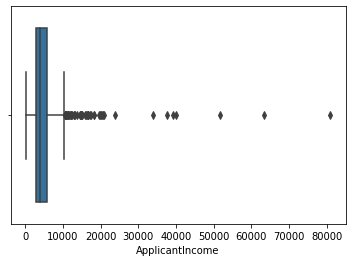

In [ ]:
import seaborn as sns

sns.boxplot(data['ApplicantIncome'])

From above plot their are more outliers. The  value after 15000 are considered to be outliers.

**2. Using Inter Quartile Range**

IQR method is used by box plot to highlight outliers. IQR stands for interquartile range, which is the difference between q3 (75th percentile) and q1 (25th percentile). The IQR method computes lower bound and upper bound to identify outliers.

- Lower bound :  q1–1.5*IQR

- Upper Bbound :  q3+1.5*IQR

Any value below the lower bound and above the upper bound are considered to be outliers.

  ```
  q1 = df['column_name'].quantile(0.25)
  q3 = df['column_name'].quantile(0.75)

  iqr = q3 - q1

  minmum = q1 - 1.5 * iqr
  maxmum = q3 + 1.5 * iqr

  The value which is less than minimum and value which is more than maximum considered as outliers.
  ```



In [ ]:
q1 = data['ApplicantIncome'].quantile(0.25)

q3 = data['ApplicantIncome'].quantile(0.75)

iqr = q3 - q1

minimum = q1 - 1.5 * iqr
maximum = q3 + 1.5 * iqr

print("Minimum of Applicant income", minimum)
print("Maximum of Applicant income", maximum)

Minimum of Applicant income -1498.75
Maximum of Applicant income 10171.25


**3. Normal Distribution**

<center><img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png" width = 350px></center>

The variable should be normally distributed. According to emperical rule 99% of data will be covered in - 3 and +3 standard deviation away from the mean. Z-score is the number of standard deviations a value of a variable is away from the variable’ mean.

The values which is less than -3 standard deviation from mean and the values which is more than +3 standard deviation from mean is considered to be outliers.


  ```
  Maximum = df['column_name'].mean() + 3*df['column_name'].std()

  Minimum = df['column_name'].mean() - 3*df['column_name'].std()

  The value which is more than maximum and less than minimum considered to be outliers
  ```

**<h2>Outlier Treatment</h2>**

- Their are some common techniques to deal with outliers

  - Deleting the observation
  - Transforming the values
  - Imputing


**1. Deleting the observation**

- we will delete the outlier values if the number  of outliers are less than we can able to remove those values. but if the number of outliers are high then we need to treat them.

**2. Transforming the values**

- Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values.

**3. Imputing**

- Imputing outliers values with mean, median or mode.

**Note : Some algorithm which does distance calculation then it is neccessary to treat outliers like KNN algorithm. Some algorithm like classification and regression trees will not effected by the outliers as it doesnot work on distance calculations.**